# Image segmentation using K-means clustering

Data Analysis Project, SS2022 <br>

*Topic 01:* Biomedical Image Analysis <br>

*Group 05:* Cedric Leonhard Marquard, Emily Locke, Melissa Ringeis, Gabriel Tulcan <br>

*Supervisor:* PD Dr. Karl Rohr, Christian Ritter <br>

*Tutor:* Marie Becker
<br>
<br>
<br>

## Abstract

In this project, a K-Means image segmentation algorithm was programmed from scratch and then applied on three data sets consisting of images showing cell nuclei, yeast cells and NIH3T3 cells. Pre-processing methods were performed to enhance the relevant image features for further segmentation. The colour images were converted into different colour spaces, such as HSV, L*a*b and YCbCr. Furthermore, the clustered images were evaluated by calculating the Dice Score.
<br>
<br>
<br>

## Table of contents
<br>
<br>
<br>
<br>

## Introduction

Image segmentation describes the division of an image into different regions based on several features. (https://www.sciencedirect.com/science/article/pii/S1077316996900210)  It is a tool to structure the objects represented in the image data by using algorithms like k-means clustering. Therefore, segmentation methods are very useful in various applications like medical imaging, autonomous driving, customer- or cell segmentation. <br>

Clustering, also known as unsupervised learning, is based on high similarity within clusters and dissimilarity between the clusters. For image segmentation, k-means is most likely used. Here, the similarity is defined according to distances like the euclidean or manhattan distance. <br>

This project has the goal to perform K-means on different images to get a clear distinction between the cells and the background. <br>

For noise reduction and better fundamentals for further analysis our raw data was transformed due to several pre-processing steps. The processed data was further converted into different colour spaces such as HSV and LAB. Additionally, the impact of other distances on the algorithm was investigated.  Finally, the quality of the segmentation was evaluated by calculating the dice score, using ground truth images.
<br>
<br>
<br>

## Material 


### Raw Data

The colour image dataset includes two images. The first image has a size of 1024×1024 pixels and consists of fluorescently labelled cell nuclei. The second image has a size of 1200×1200 pixels and shows yeast cells.<br>

The chosen grayscale image data set is NIH3T3, which shows mouse embryonic cells stained with Hoechst. The images have a size of 1344x1024 pixels.<br> 

Additionally, the “Human HT29 colon-cancer cells” (BBBC008) data set (Carpenter et al., Genome Biology, 2006) from the Broad Bioimage Benchmark Collection (BBBC) of the Broad Institute was selected for clustering. The data set consists of 24 grayscale images with a size of 512x512 pixels. <br>  

For the colour image data set Adobe® Photoshop was used in order to create the ground truth images needed for evaluating the clustering method. The ground truth images for the grayscales datasets were already provided.
<br>
<br>

### Software

The programming language used in this project was Python. The Python interpreter was Visual Studio Code. In order to add image processing capabilities the two following packages were installed: Python Imaging Library from Pillow and OpenCV. Conda was used as package and environment manager.
<br>
<br>
<br>

## Methods

In [18]:
import visualisation as vs

### Pre-processing

Pre-processing was implemented in order to improve the quality of the data. The final goal is to reduce noise, suppress undesired distortions and enhance the important features.
<br>
<br>

### Filtering

Different filters were used to compare their outputs and evaluate which one works best. For each filter other than bright spots pre-implemented functions of the PIL Image package were used.
<br>
<br>

#### Median filter

The median filter is a non-linear filter which is mostly used to reduce impulsive noise like the salt and pepper noise. (https://www.researchgate.net/profile/Suthanthira-Vanitha/publication/269781123_The_PreProcessing_Techniques_for_Breast_Cancer_Detection_in_Mammography_Images/links/5bb36abf45851574f7f48007/The-Pre-Processing-Techniques-for-Breast-Cancer-Detection-in-Mammography-Images.pdf) 
<br>
<br>

#### Gauss filter

The gaussian filter is often used before performing edge detection to remove edges caused by noise. (https://d1wqtxts1xzle7.cloudfront.net/53620316/IRJET-V4I1250-libre.pdf?1) It is more effective for smoothening images but not used to reduce salt and pepper noise. 
<br>
<br>

#### Edge enhancement

As cell images often consist of structures which can’t be assigned clearly, edge enhancement is a useful tool to visualize important structures. (https://www.sciencedirect.com/science/article/pii/S1568494611004959?casa_token=0oHqiPEpowQAAAAA:hBsHRe4Wwe_VAausByGL4QaxyD1kGMsIp0YBEjGUyN_kSHFqaD9QyJh7CqfQd1hD01nSdrJZHlhR)
This is obtained by using a filter mask which increases the contrast of the pixels around the edges of interest, leading to a higher output at the edges compared to the surroundings.
<br>
<br>

#### Sharpened

Quellen?? A sharpening filter makes the transition between the various regions present in an image more obvious rather than being smooth.
As an image passes through a sharpening filter the brighter pixels are boosted as relative to its neighbours.
Bright spots
In order to improve the segmentation of the grayscale images, a function has been created to remove the bright spots caused by reflections. This was done so by selecting a threshold and setting higher intensity values to an intensity value similar to the background. 
<br>
<br>

### Colour conversion
The colour conversion was programmed manually using conversion formulas from RGB to the different colour spaces and functions of the PIL Image package. <br> 

HSV is a colour space defined as a cylindrical coordinate system assembled of hue (H), saturation (S) and brightness value (V). <br>

L*a*b is a perceptually uniform colour space, which expresses colour as three values: perceptual lightness (L*), red/green (a*) and yellow/blue (b*).  https://arxiv.org/ftp/arxiv/papers/1506/1506.01472.pdf. The applied formula was for the D65 Standard Illuminant. <br>

YCbCr is a colour space assembled of luminance (Y), blue-difference component (Cb) and red-difference component (Cr).
https://www.buecher.de/shop/englische-buecher/ycbcr/broschiertes-buch/products_products/detail/prod_id/29904873/

Because the PIL Image package only supports the 8 bit format for the colour values of the various colour spaces, the values have been normalized to this format. 
<br>
<br>

### K-means clustering

hier kommt Cedrics Schema + kurze Erklärung

For the K-means colour clustering algorithm more distance measurements were tested in order to evaluate the impact on the quality of the image segmentation. First, the most common metric distances known as Minkowski distances were applied: Euclidean, Manhattan and Chebyshev. Additionally, the correlation distance using the Pearson correlation coefficient was used as a different form of distance measurement. For the grayscale images the difference of intensity levels was used instead of the distance.
<br>
<br>

### Morphological operations

Morphological operations describe the image processing based on special structure elements. They are used to improve the output data of image segmentation by closing holes or reducing noise. The following operations were implemented: Dilation, Erosion, Closing, Opening, using different kernel sizes. The functions for the morphological operations were imported from the OpenCV package. 
<br>
<br>

### Dice score

The Dice score is used to evaluate the performance of the segmentation algorithm by comparing the output data to the respective ground truth images. It is calculated using the following formula:

$$
Dice = \frac{2*TP}{(TP+FP)+(TP+FN)}
$$

True positives are the pixels that were assigned to the correct cluster. False positives however, are pixels that were falsely assigned to the cluster, whereas false negatives were not detected as part of the cluster. The dice score ranges between 0 and 1, with 0 meaning there is no similarity at all between the images and 1 meaning they are completely similar. 
<br>
<br>
<br>

## Results


### Colour space conversion

The coloured images have been converted to the HSV, L*a*b and YCbCr colour spaces using the aforementioned method. The output images were compared with  the conversion functions of the PIL Image and OpenCV packages. For HSV and YCbCr, the conversion was accurate. The L*a*b conversion resulted in correct colours, but darker colour shades.
<br>
<br>

### K-Means

For each image the number of centroids was set to two and the maximum of iterations to 30. Different preprocessing steps, colour spaces and distances were applied on the data. In the following, every factor will be discussed separately. For clarity and a better overview of the factors, only certain combinations will be shown. The full results can be seen in the Appendix (Table X).
<br>
<br>

### Preprocessing

In the table below the results of different pre-processing methods are shown in comparison to the unprocessed images. Only RGB images which were clustered using the euclidean distance are shown in diagram X. <br>

For the cell nuclei the edge enhancement apparently worsened the output, resulting in a dice score of just 56%. All the other values are very similar within a range of 0.7%. The highest dice score of 96.4 % could be achieved by using the gauss filter. <br>

The yeast cells could not reach dice scores as high as the cell nuclei. The results are quite consistent for all methods with values of 87.6%, 85.3%, 87.3% and 87.6% respectively.
<br>
<br>

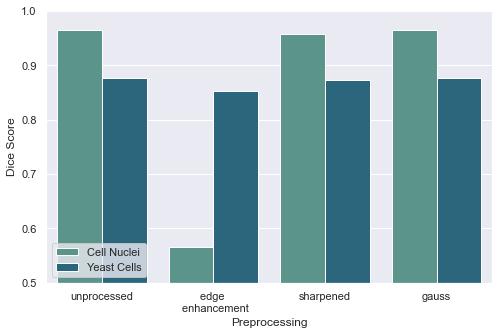

In [15]:
vs.barplot_preprocessing()

### Colour spaces

The unprocessed and converted images can be seen in the Appendix.
The following plot shows the results of k-means clustering based on the four different colour spaces used. Only not pre-processed images clustered using the euclidean distance are shown in the diagram below. 
It is evident that clustering the image of the cell nuclei, higher dice scores could be achieved. The highest result of 0.964 was obtained by using the RGB colour space. For the yeast cells YbCr worked best. Here, a dice score of 0.885 was achieved. Overall, the results are consistent.
<br>
<br>

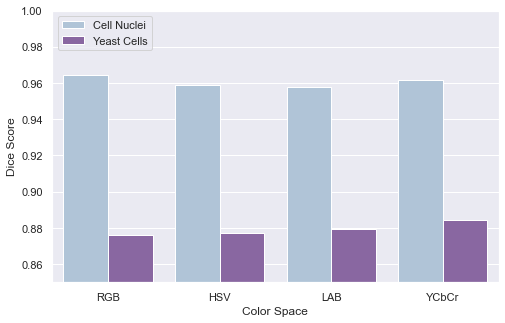

In [6]:
vs.barplot_colorspaces()

### Distances

To evaluate the distance metric, four different distances were compared. Unprocessed RGB images were used.
Regarding the cell nuclei no significant improvements could be obtained. All dice scores are within 0.960 and 0.964. The correlation distance resulted in a remarkably lower value for the yeast cells (0.424). 
<br>
<br>

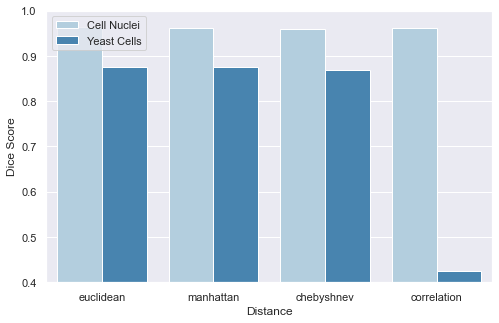

In [7]:
vs.barplot_distances()



### Time-it

For further analysis, the runtime of the k-means algorithm using different distance metrics was measured. The fastest segmentation was reached with the chebyshev distance. Both the manhattan and euclidean distance were slower, but the algorithm was still able to perform the segmentation with under 5 minutes per loop. However, the correlation distance produced a significantly higher runtime of around 2 hours per loop. The slowest run took almost 50 times longer than the fastest which resulted in a standard deviation of +- 4 hours and 28 minutes.

Euclidean:
4min 27s ± 1min 40s per loop (mean ± std. dev. of 7 runs, 1 loop each)

Manhattan:
3min ± 42.4 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

Chebyshev:
2min 25s ± 40.9 s per loop (mean ± std. dev. of 7 runs, 1 loop each)

Correlation:
The slowest run took 46.91 times longer than the fastest. This could mean that an intermediate result is being cached.
2h 14min 7s ± 4h 28min per loop (mean ± std. dev. of 7 runs, 1 loop each)
<br>
<br>

### Positions

The feature space was expanded using the position of the image pixels. Thus, the k-means algorithm operated on a five dimensional space consisting of the coordinates and the colour values. Because the position values have a much bigger range (from 0 to 1023 or 1199 respectively) than the RGB values (0 to 255), the data has been normalized. <br>

However, using the position as an additional feature deteriorated the results significantly. As shown in the image below, the algorithm now is unable to detect the difference between foreground and background and rather just clusters the pixels depending on whether they are closer to one centroid or the other. <br>

When the position was only weighted 10 %, the results were good with a dice score of 96.6 % for the cell nuclei image. This shows that taking the position into account does not improve clustering.
<br>
<br>

### Combinations

We tried out various combinations of preprocessing steps, colour spaces and distances to evaluate which methods are working best on the respective data.

For the yeast cells the best combination seems to be using the unprocessed image in the YCbCr colour space and applying the manhattan distance. A dice score of 88.6% could be reached. However, this combination only produces a better dice score of around 0.15% than the second best combination and the values are all quite similar in general. <br>

For the cell nuclei the best combination seems to be using the image in an RGB colour space and applying the euclidean metric as well as the gauss filter. This combination produced a dice score of 96.4%. But, just as it is the case with the yeast cells, the gap to the dice scores of other combinations is very small, only consisting of 0.11%. <br>

evtl. die zwei besten Kombinationen hinschreiben und eine schlechtere und dann in der diskussion nochmal darauf eingehen
<br>
<br>
<br>

## Gray-scaled images 


### NIH3T3 fibroblasts

Pre-processing using filters from the PIL package could not improve the results of the grayscale images. The  median filter showed a large degree of variation whereas edge enhancement was more consistent except for two outliers. The morphological operations increased the dice score about XX%.

See Apendix.
<br>
<br>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


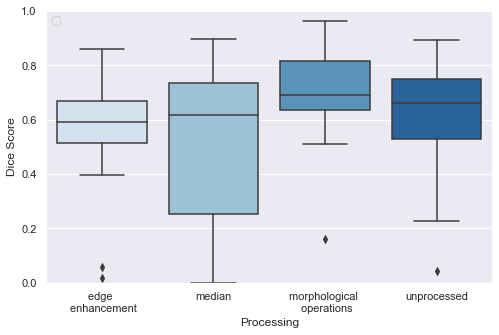

In [19]:
vs.boxplot_grayscale()

### Bright spots

The removal of bright spots using the aforementioned method improved the dice score significantly. For instance, clustering of the unprocessed image number 32 could only achieve a dice score of 4.2%. However, a dice score of 63.2% could be reached after removing the bright spots. This method was applied on images with dice scores below 50% and was able to improve the clustering significantly, as shown in the plot below.
(hier am besten Bilder von img32 einfügen: unprocessed, unprocessed clustered, bright spots removed, bright spots removed clustered)

Image
DSC unprocessed
DSC reflections removed
32
0.042206968
0.6319353468258981
42
0.22747751
0.4190362620485571
46
0.337250643
0.6322432856550206
47
0.253191809
0.7658440389259635

→ Plot
<br>
<br>

### BBBC images

Here, the median filter led to a median dice score of XX compared to the unprocessed results XX. Edge enhancement worsened the results significantly. Also, the dice scores of edge enhanced images spread widely, indicating that this preprocessing method leads to an inconsistency of the algorithm’s performance.
Overall, relatively high dice scores could be obtained with the unprocessed pictures which confirms the algorithm’s efficiency and functionality. 

See Appendix.
<br>
<br>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


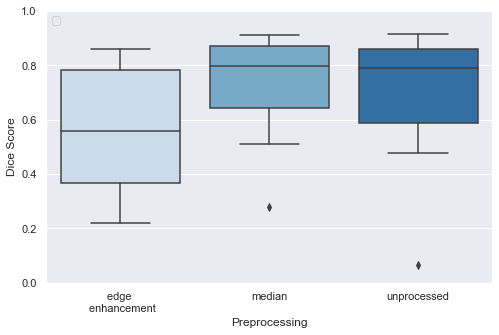

In [17]:
vs.boxplot_BBBC()

### Morphological operations 

To improve the clustered images morphological operations were applied. The kernel sizes 3x3, 5x5, 10x10, 15x15, 20x20 and 25x25 were implemented.
For the colour images, the methods Dilation, Erosion, Closing and Opening were used. However, none of them could improve the Dice Score. Hence, they will not be shown and discussed further.

Due to time constraints provoked by the size of the large NIH3T3 data set, only Erosion and Dilation were applied. As erosion had no positive effect on the output it is not shown in the results. In contrast, Dilation could significantly improve the dice scores. Dilation mostly worked best with a kernel size of 10x10 or 25x25 and could increase the dice scores up to    %.
<br>
<br>

### Comparison with OpenCV K-Means function

The two colour images and the grayscale images which produced the best and worst Dice Scores with our algorithm (dna-0.png and dna-32.png) are compared with the Dice Scores of the OpenCV K-Means clustering algorithm in Table X.


Our algorithm
OpenCV algorithm
Cell Nuclei RGB no filter euclidean
0.964148982
0.9646510487914961
Yeast Cells RGB no filter euclidean
0.876158369
0.8723028889007954
Dna-0.png no filter
0.894378322
0.8485667379915885
Dna-32.png no filter
0.042206968
0.02619471363787789

The OpenCV package shows similar Dice Scores for the coloured images but lower Dice Scores for the grayscale images.
Comparison with Otsu
To evaluate which segmentation method works best, our results were compared to those of group 04. 
<br>
<br>
<br>

## Discussion and Conclusion

In this project we proposed different methods to optimize the segmentation of coloured as well as grayscale images using the K-means algorithm. The results of the clustering were then evaluated by calculating Dice Scores. The ground truth data for the coloured images was created manually. Hence, the true positions of the cells could not be defined exactly. Especially the edges of cells or cell nuclei could not be assigned clearly. Therefore, the evaluation with the Dice Score is prone to errors. <br>

The Cell Nuclei coloured image was almost perfectly clustered by the algorithm, leading to very high Dice Scores. A nearly perfect Dice Score might have been achieved if the ground truth images were no source of error. An explanation for these excellent results is the fact that the Cell Nuclei image consists of only three colours and the Cell Nuclei have a very different colour compared to the rest of the image. <br>

The Yeast Cells led to significantly lower but still satisfactory Dice Scores. This is because the transitions from cells to background are very blurry, making the cells “glow”. The clustering algorithm detected the blurs as cells because they have a remarkably different colour compared to the background. In the ground truth images the blurrs are counted as background. Furthermore, some cells are quite dark, making it difficult for the algorithm to distinguish them from the background. This led to holes in the cells as they were falsely assigned to the background. Therefore, the clustering of the Yeast Cells could not achieve the very good results of the Cell Nuclei clustering. <br>

Pre-processing did not improve Dice Scores on coloured images. The input data seemed rather ideal and processed by a computer. Here, the cells already were very detailed and sharp with almost no noise or reflections. Especially, edge enhancement did not work well on cell nuclei because……. This was not expected, because these filters should have improved the clustering by making the transitions between cells and background less blurry and thus the different areas could have been more accurately clustered. <br>

The conversion to different colour spaces did not lead to significantly different results. The L*a*b conversion was not completely accurate because some values were negative and probably not supported by the .putdata() function of the PIL Image package. Nevertheless, the L*a*b images produced results of the same quality as the other colour spaces. L*a*b might have resulted in better Dice Scores if the conversion were 100% accurate. The small difference between the colour spaces indicates that all the implemented colour spaces are appropriate for an image segmentation using a K-Means algorithm. <br>

The metric Minkowski distances (Euclidean, Manhattan, Chebyshev) led to very similar results when applied to colour images, whereas the Correlation distance led to good results for the Cell Nuclei but worse results for the Yeast Cells. Moreover, the run-time for all the distances differed significantly, with the Chebyshev distance being the fastest and the Correlation distance being by far the slowest. This could be because the Chebyshev formula is quite simple (only a substraction), whereas for the Correlation distance the Pearson Correlation Coefficient needs to be calculated. <br>

The overall very similar results between colour spaces and metric distances could be explained by the fact that the K-Means algorithm was run for 30 iterations. The correct centroids for every cluster could be reached for almost every combination after such a high number of iterations. Since the combinations produced generally very similar Dice Scores and the combinations that led to the best results were not consistent for the two coloured images, no “perfect recipe” for clustering could have been determined. This also means that the algorithm works similarly well with all the different factors and does not “prefer” a particular colour space or distance. <br>

As the segmentation of the coloured images led to very high dice scores, morphological operations could not further improve them. However, the operation Dilation worked really well for the grayscale images of the NIH3T3 data set. As shown in figure XY their dilation could increase the dice score up to 15%. Since the NIH3T3 data set often contains cells with dark insides and dark cell borders, the K-Means algorithm might have mistakenly clustered the dark insides of cells and parts of the cell borders as background and thus led to holes and unclear boundaries. This could be the explanation for the significant improvement of the Dice Scores after using Dilation. <br>

One of the biggest challenges of the NIH3T3 data set were also the reflections that can be found in various images. Because of the high intensity of such bright spots, the algorithm assigns the reflections to one cluster and the much darker cells together with the black background to another cluster. This led to very different Dice Scores for the grayscale images, depending on the existence and number of the bright spots. After the removal of the bright spots, the Dice Scores improved significantly. <br>

Using the position as an additional feature did not improve the segmentation of the image. Rather, it led to inefficient clustering. Clearly, the algorithm assigns the pixels to the closest centroid which results in an image where one half is black and the other white, according to the position of the centroids. As we are only looking for two clusters, namely cells and background, taking the position into account is not constructive, because whether a pixel belongs to a cell or not does not depend on its position but rather on its colour value. However, using the position as an additional feature might improve clustering when counting cells rather than just distinguishing foreground from background. In that case, the position could help filling holes in cells or assigning the cell’s border correctly. Nevertheless, for this project’s goal of segmenting cells and background the position as an additional feature impairs the algorithm’s performance. <br>

In conclusion, our K-Means algorithm could successfully cluster both coloured and grayscale images and managed to provide satisfactory results that were very similar to those of the OpenCV package. Vielleicht noch was zu Otsu
<br>
<br>
<br>

Brainstroming:D
LAB conversion not 100% effective maybe because of the negative values and the put data function
The ground truth images for the coloured images are not perfect because they were manually produced and are therefore prone to errors. hence, the dice score is a very good but not perfect way to evaluate the clustered images (we might actually have 100% good clustering on the cell nuclei)
Cell Nuclei cluster better than Yeast Cells because fewer colours and because RGB colours. Also because algorithm sees the “glow” of the yeast cells as cells but the ground truth images for yeast cells are without glow. (ground truth images are also source of error)
 Morphological operations probably did not work on coloured images because they were very good clustered (no holes etc.).
Pre-processing did not improve dice scores on coloured images because the images don’t seem to be realistic (maybe another word would be better here) and seem to be ideal: they seem computer made as they are really sharp, detailed and there are no reflections and few noise. 
Edge enhancement did not work on cell nuclei because the edges are enhanced using the neighbourhood which are of different colour ????? (Emi du hattest hier eine ganz schoene Erklaerung) filter macht salt and pepper noise, im bild keine homogenen bereiche, macht nicht nur höheren Kontrast bei den edges sondern auch zwischen anderen pixeln
Grayscale Dice Scores not always good because of reflections and too much of a difference between the intenisity of reflections (very white) and cells (dark gray), sometimes cells were clustered as background because of this. In the images with little to no reflections the dice scores were quite good. This was also the case for the BBBC data set. → this could be improved by removing the bright spots
Morphological Operations very good for grayscale images because there are sometimes holes in the clusters or the borders of the clusters are not “firm”. This could be because the insides of the cells or the cell borders are sometimes quite dark and thus clustered as background
No significant difference between colour spaces and distances because of 30 iterations so the clustering is really good ??? again the same story that the ideal colour images ….. vielleicht hier paar Vergleiche mit anderen Papers
Time it: Euclidean formula is more complicated (with square and stuff), Manhattan is simpler and the Chebyshev has the most simple formula → shorter runtime. Correlation takes a lot of time because of the calculation of the Pearson Correlation Coefficient for every pixel. ????
Wieso sind bestimmte kombinationen gut/schlecht?
<br>
<br>
<br>

## Appendix

Bibliography

Links für Paper etc.
vielleicht könnte man bei Methods auch die PIL und OpenCV2 Packages erwähnen.
Distances: 
https://www.researchgate.net/profile/Ajay-Rana-2/publication/258790152_K-means_with_Three_different_Distance_Metrics/links/5fd706f092851c13fe84d975/K-means-with-Three-different-Distance-Metrics.pdf
https://www.sciencedirect.com/science/article/pii/S0031320311003517
k-means mit verschiedenen Distanzen:
https://www.researchgate.net/publication/258790152_K-means_with_Three_different_Distance_Metrics
Image segmentation LAB and HSV:
 https://arxiv.org/ftp/arxiv/papers/1506/1506.01472.pdf
LAB am besten: https://www.cv.tu-berlin.de/fileadmin/fg140/VISAPP_2014_127_CR.pdf